# 12. 이원 분산분석 (상호작용이 중요함)


## 설정

### 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [5]:
df = pd.read_csv('./data/09_1.TWA.csv', encoding = 'cp949')
df.head()

,온도,방법,맛점수1,맛점수2,맛점수3
0,1,1,84,93,84
1,1,1,87,91,87
2,1,1,85,92,85
3,1,1,89,96,89
4,1,1,85,95,85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   온도      60 non-null     int64
 1   방법      60 non-null     int64
 2   맛점수1    60 non-null     int64
 3   맛점수2    60 non-null     int64
 4   맛점수3    60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


In [12]:
# 범주형 변수 처리

df['온도'].replace({1:'200도', 2:'300도'}, inplace = True)
df['온도'] = df['온도'].astype('category')

df['방법'].replace({1:'오븐', 2:'기름'}, inplace = True)
df['방법'] = df['방법'].astype('category')

df.head()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\2895625455.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['온도'].replace({1:'200도', 2:'300도'}, inplace = True)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\2895625455.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

,온도,방법,맛점수1,맛점수2,맛점수3
0,200도,오븐,84,93,84
1,200도,오븐,87,91,87
2,200도,오븐,85,92,85
3,200도,오븐,89,96,89
4,200도,오븐,85,95,85


In [13]:
df.groupby(['온도', '방법'])['맛점수1'].describe().round(3)

C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\643805662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['온도', '방법'])['맛점수1'].describe().round(3)


count    mean    std   min    25%   50%    75%   max
온도   방법                                                      
200도 기름   15.0  94.000  2.299  90.0  92.50  94.0  95.50  98.0
     오븐   14.0  87.500  2.029  84.0  86.25  87.5  89.00  91.0
300도 기름   15.0  86.000  1.195  84.0  85.00  86.0  87.00  88.0
     오븐   16.0  94.188  2.040  91.0  92.75  94.0  95.25  98.0

In [9]:
df.columns

Index(['온도', '방법', '맛점수1', '맛점수2', '맛점수3'], dtype='object')

In [14]:
# 분석 변수가 여러 개일 때

num_feature = ['온도', '방법', '맛점수1', '맛점수2', '맛점수3']

for num in num_feature:
    print("---", num, "---")
    results = df.groupby('온도')[num].describe().round(3)
    print(results, "\n")

--- 온도 ---
     count unique   top freq
온도                          
200도    29      1  200도   29
300도    31      1  300도   31 

--- 방법 ---
     count unique top freq
온도                        
200도    29      2  기름   15
300도    31      2  오븐   16 

--- 맛점수1 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  90.862  3.935  84.0  88.0  91.0  94.0  98.0
300도   31.0  90.226  4.477  84.0  86.0  91.0  94.0  98.0 

--- 맛점수2 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  88.897  3.559  84.0  86.0  88.0  92.0  96.0
300도   31.0  91.032  4.012  82.0  88.0  91.0  94.0  98.0 

--- 맛점수3 ---
      count    mean    std   min   25%   50%   75%   max
온도                                                      
200도   29.0  86.724  1.791  84.0  85.0  87.0  88.0  91.0
300도   31.0  94.097  2.135  90.0  92.5  94.0  95.5  98.0 



C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('온도')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('온도')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_9876\3621626555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

## 4. 통계 분석 (TW-ANOVA)

### 4.0 independent T-test

In [ ]:
# 차이가 있는 경우
# 온도만 확인함.
x = df['맛점수1'][df['온도'] == '200도']
y = df['맛점수1'][df['온도'] == '300도']

In [16]:
# 온도만 확

pg.ttest(x,y, paired = False,
         alternative="two-sided",
         correction = False).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.58,58,two-sided,0.56,"[-1.55, 2.82]",0.15,0.303,0.09


차이가 없음. 귀무가설 채택

In [19]:
# 차이가 있는 경우
# 온도만 확인함.
x = df['맛점수1'][df['방법'] == '오븐']
y = df['맛점수1'][df['방법'] == '기름']

In [20]:
# 온도만 확

pg.ttest(x,y, paired = False,
         alternative="two-sided",
         correction = False).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.98,58,two-sided,0.33,"[-1.1, 3.24]",0.25,0.394,0.16


차이가 없음. 귀무가설 채택

## 4.1 상호작용 검증

In [22]:
# 상호작용을 검증할 때
# ss_type = 3

pg.anova(dv = '맛점수1',
            between = ['온도', '방법',],
            ss_type = 3,
            data = df).round(3) 

,Source,SS,DF,MS,F,p-unc,np2
0,온도,6.446,1.0,6.446,1.719,0.195,0.030
1,방법,10.655,1.0,10.655,2.842,0.097,0.048
2,온도 * 방법,807.158,1.0,807.158,215.306,0.000,0.794
3,Residual,209.938,56.0,3.749,NaN,NaN,NaN


- 온도, 방법은 귀무가설 채택
- 온도 * 방법 상호작용은 귀무가설 기각, 연구가설 채택

In [23]:
#post-hoc : 상호작용 있을 때
pg.pairwise_tests(dv = '맛점수1',
                  between = ['온도', '방법'],
                  data = df).round(3)

,Contrast,온도,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,-,200도,300도,False,True,0.586,57.784,two-sided,0.56,0.303,0.149
1,방법,-,기름,오븐,False,True,-0.983,58.000,two-sided,0.33,0.394,-0.251
2,온도 * 방법,200도,기름,오븐,False,True,8.085,26.923,two-sided,0.00,7.154e+05,2.907
3,온도 * 방법,300도,기름,오븐,False,True,-13.734,24.478,two-sided,0.00,1.155e+11,-4.729


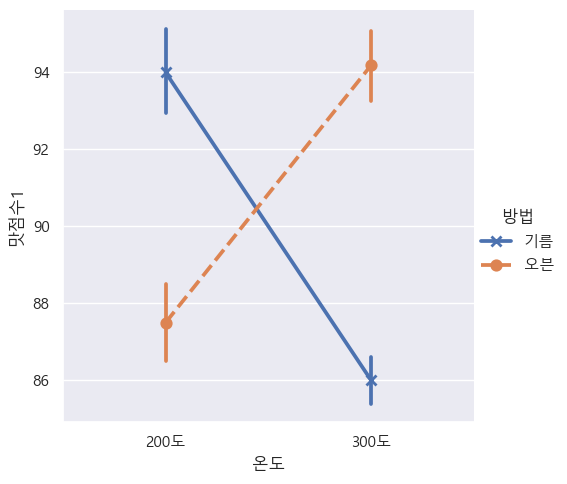

In [27]:
# 그래프

sns.catplot(x = '온도',
            y = '맛점수1',
            hue = '방법',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

X 자는 상호작용 있는 것

### 4.2 상호작용 효과 없을 때

In [28]:
# 상호 작용 효과 없을 때, 2개의 주요 효과만 있을 때
# ss_type = 2 (3으로 돌려도 상관없음. 주요 효과에만 focus하는 의미)

pg.anova(dv = '맛점수2',
            between = ['온도', '방법',],
            ss_type = 2,
            data = df).round(3)  # 상세한 디테일 값이 나옴

,Source,SS,DF,MS,F,p-unc,np2
0,온도,55.548,1.0,55.548,12.555,0.001,0.183
1,방법,588.872,1.0,588.872,133.094,0.000,0.704
2,온도 * 방법,1.015,1.0,1.015,0.229,0.634,0.004
3,Residual,247.771,56.0,4.424,NaN,NaN,NaN


In [31]:
# 상호작용 효과 제거 모형
# independent로 봤던 것처럼 주요 효과 2개만 보는 것이 힘듦.
# 그래서 다른 모델 사용.

# 그래도 그냥 위의 코드 사용 추

from statsmodels.formula.api import ols

model = ols('맛점수2 ~C(온도)+C(방법)', data = df)
result = model.fit()
anova_table = sm.stats.anova_lm(result, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(온도),55.547513,1.0,12.726643,7.389417e-04
C(방법),588.871577,1.0,134.917978,1.172735e-16
Residual,248.785820,57.0,NaN,NaN


In [32]:
# 사후분석 post-hoc : 상호작용 없을 때
pg.pairwise_tests(dv = '맛점수2',
                  between = ['온도', '방법'],
                  interaction = False,
                  data = df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,200도,300도,False,True,-2.184,57.845,two-sided,0.033,1.873,-0.555
1,방법,기름,오븐,False,True,-10.708,58.000,two-sided,0.000,1.76e+12,-2.729


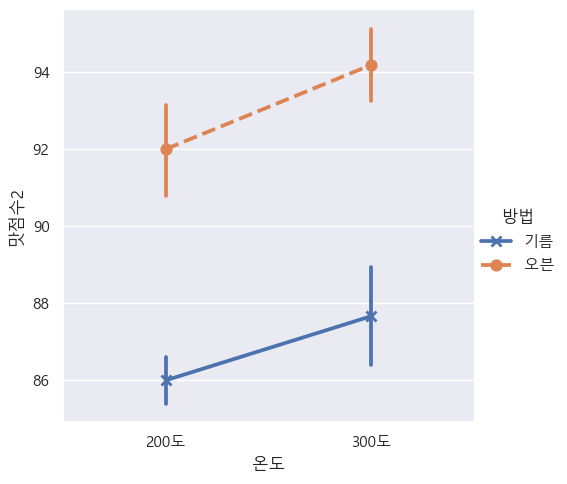

In [30]:
# 그래프

sns.catplot(x = '온도',
            y = '맛점수2',
            hue = '방법',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

### 4.3 상호작용 효과 없을 때, 1개 메인 효과만 있을 때

In [33]:
pg.anova(dv = '맛점수3',
            between = ['온도', '방법',],
            ss_type = 2,
            data = df).round(3)  # 상세한 디테일 값이 나옴

,Source,SS,DF,MS,F,p-unc,np2
0,온도,807.484,1.0,807.484,215.393,0.000,0.794
1,방법,10.120,1.0,10.120,2.699,0.106,0.046
2,온도 * 방법,6.446,1.0,6.446,1.719,0.195,0.030
3,Residual,209.938,56.0,3.749,NaN,NaN,NaN


In [34]:
#p 사후 분석 ost-hoc : 상호작용 없을 때
pg.pairwise_tests(dv = '맛점수3',
                  between = ['온도', '방법'],
                  interaction = False,
                  data = df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,200도,300도,False,True,-14.527,57.344,two-sided,0.00,4.679e+17,-3.682
1,방법,기름,오븐,False,True,-0.983,58.000,two-sided,0.33,0.394,-0.251


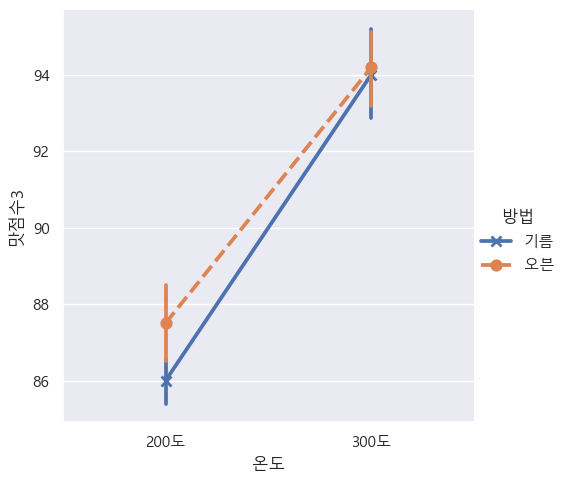

In [35]:
# 그래프

sns.catplot(x = '온도',
            y = '맛점수3',
            hue = '방법',
            marker = ['x', 'o'],
            linestyles = ['-', '--'],
            kind = 'point',
            data = df
            )
plt.show()

## 5.1 등분산 검정 
    - 정규성은 안해도 되고
    - 등분산도 안해도 되지만 해도 됨

In [ ]:
# 변수가 2개이므로 bioinfokit package 사용

!pip install bioinfokit

In [50]:
from scipy.stats import levene

group1 = df[(df['온도'] == '200도') & (df['방법'] =='오븐')]['맛점수1']
group2 = df[(df['온도'] == '200도') & (df['방법'] =='기름')]['맛점수1']
group3 = df[(df['온도'] == '300도') & (df['방법'] =='오븐')]['맛점수1']
group4 = df[(df['온도'] == '300도') & (df['방법'] =='기름')]['맛점수1']

stat, p = levene(group1, group2, group3, group4, center='median')
print(stat, p)

1.4620414962179433 0.23472122666103704


## 6. 정규성 검정

In [41]:
# one way anova 

model = ols('맛점수1 ~ C(온도)+C(방법)+C(온도):C(방법)',
            data = df)
results = model.fit()
pg.normality(results.resid).round(3) #resid : 잔차

,W,pval,normal
0,0.981,0.475,True
